In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#do imports
import seaborn as sns
sns.set()
import numpy as np
from scipy.linalg import norm
from scipy.spatial.distance import euclidean
%matplotlib inline
import numpy as np
from scipy import stats
from scipy import special as fn
import collections, itertools
import matplotlib.pyplot as plt
from operator import itemgetter as at
from random import randint
import random
import matplotlib.dates as mdate
import datetime as dt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

try:
    from matplotlib import pyplot as plt
except:
    plt = None
import pandas
from datetime import timedelta

In [3]:
#read csv
df = pandas.read_csv('LowerBigCreek_HoboMX2001_Fall2018.csv')
#rename headers
df=df.rename(columns = {'Date Time, GMT -0600':'date'})
df=df.rename(columns = {'Temp, (*F)':'temp'})
df=df.rename(columns = {'Water Level, (ft)':'water'})

#convert datetime for indexing later on
df['datetime'] = pandas.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)

In [4]:
#select dates within the time range and plot
def interactive_plot(df, d1, d2, d3, d4, d5):
    if 'Daily' in str(d1):
        date2 = df.index.max() #get the latest date
        date1 = df.index.max() - timedelta(days = 1) #select range from now till days as specified by the user   
        df = df.loc[date1:date2] #select dates within the time range
    elif 'Weekly' in str(d1):
        date2 = df.index.max() #get the latest date
        date1 = df.index.max() - timedelta(days = 7) #select range from now till days as specified by the user   
        df = df.loc[date1:date2] #select dates within the time range
    elif 'Monthly' in str(d1):
        date2 = df.index.max() #get the latest date
        date1 = df.index.max() - timedelta(days = 30) #select range from now till days as specified by the user   
        df = df.loc[date1:date2] #select dates within the time range
    
    # make columns numeric
    def coerce_df_columns_to_numeric(df, column_list):
        df[column_list] = df[column_list].apply(pandas.to_numeric, errors='coerce')

    coerce_df_columns_to_numeric(df, ['temp','water'])
    
    #Get means by date
    df.index = pandas.to_datetime(df.index, unit='s')
    daily_max = df.resample('D').max()
    daily = df.resample('D').mean()
    daily_min = df.resample('D').min()
    
    sns.set(style="whitegrid")
    
    if 'Water' in str(d2):
        if d4 == True:
            #plot mean water level
            water = daily.water #obtain mean water column from the pandas frame
            y = water.values
            x = range(0,len(water.index))
            x_label = water.index.strftime("%Y/%m/%d").tolist() #get dates for plotting, still need to figure out how to plot this
            plt.plot(x, y, 'bo', markersize=18, markeredgecolor='k') #plot it
            plt.plot(x, y, 'k-',linewidth=4, label='Daily mean')
        if d3 == True:
            #plot max water level
            water = daily_max.water #obtain mean water column from the pandas frame
            y = water.values
            plt.plot(x, y, '--',linewidth=2, c='#B4B2B2', markersize=5, label='Daily max')
        if d5 == True:
            #plot min water level
            water = daily_min.water #obtain mean water column from the pandas frame
            y = water.values
            plt.plot(x, y, '--',linewidth=2, c='#B4B2B2', markersize=5, label='Daily min')

        #customize plot
        plt.legend(loc='upper left', prop={'size': 18})
        plt.ylim([1.4, 1.8]) #y limit
        plt.xlim([0, len(water.index)]) #x limit
        plt.xlabel('Day', size='large')
        plt.ylabel('Water Level (in ft)', size='large')
        plt.tick_params(axis='both', which='both', bottom='off', top='off', right='off', left='off',labelsize = 18)
        fig = plt.gcf()
        fig.set_size_inches(12, 8)
        plt.rcParams.update({'font.size': 22})

    elif 'Temp' in str(d2):   
        if d4 == True:
            #plot mean temp level
            water = daily.temp #obtain mean temp column from the pandas frame
            y = water.values
            x = range(0,len(water.index))
            x_label = water.index.strftime("%Y/%m/%d").tolist() #get dates for plotting, still need to figure out how to plot this
            plt.plot(x, y, 'bo', markersize=18, markeredgecolor='k') #plot it
            plt.plot(x, y, 'k-',linewidth=4, label='Daily mean')
        if d3 == True:
            #plot max temp level
            water = daily_max.temp #obtain max temp column from the pandas frame
            y = water.values
            plt.plot(x, y, '--',linewidth=2, c='#B4B2B2', markersize=5, label='Daily max')
        if d5 == True:
            #plot min temp level
            water = daily_min.temp #obtain min temp column from the pandas frame
            y = water.values
            plt.plot(x, y, '--',linewidth=2, c='#B4B2B2', markersize=5, label='Daily min')

        #customize plot
        plt.legend(loc='best', prop={'size': 18})
        plt.ylim([30, 60]) #y limit
        plt.xlim([0, len(water.index)]) #x limit
        plt.xlabel('Day', size='large')
        plt.ylabel('Mean Temperature (in Fahrenheit)', size='large')
        plt.tick_params(axis='both', which='both', bottom='off', top='off', right='off', left='off',labelsize = 18)
        fig = plt.gcf()
        fig.set_size_inches(12, 8)
        plt.rcParams.update({'font.size': 22})

c:\users\rach0_000\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


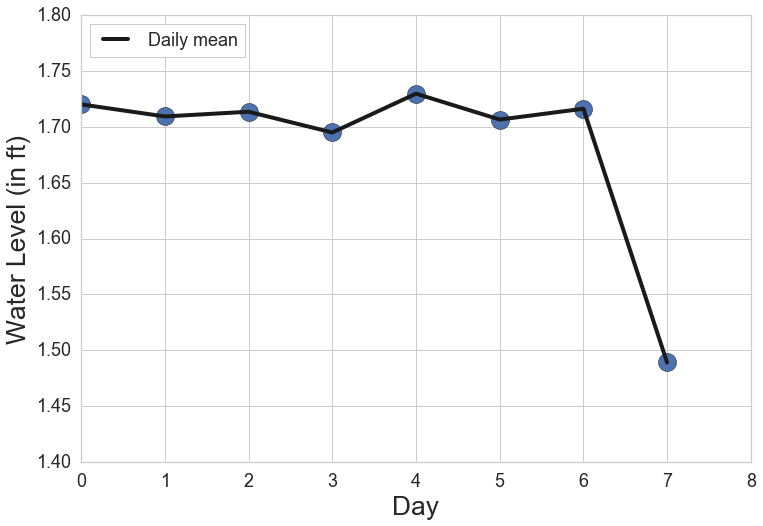

In [5]:
from ipywidgets import Dropdown, Checkbox
interact_manual(interactive_plot,df = fixed(df), d1=Dropdown(options=['Daily', 'Weekly', 'Monthly'], value='Weekly', description='Time Period', disabled=False),
               d2=Dropdown(options=['Water', 'Temp'], value='Water', description='Observation Type', disabled=False),
               d3 = Checkbox(value=False, description='Max', disabled=False), 
               d4 = Checkbox(value=True, description='Mean', disabled=False),
               d5 = Checkbox(value=False, description='Min', disabled=False));